In [1]:
import numpy as np
import matplotlib.pyplot as plt

def join_selected_spsp(nruns, selected_spsp):

    tot_arr = []
    for d in range(3):
        arr = []
        for i in range(nruns):
            arr.append(np.squeeze(selected_spsp[i][0][d]))

        tot_arr.append(np.vstack(arr))

    combined_arr =  np.array(tot_arr, dtype='object')

    return combined_arr

def join_nz(nruns, nzs):

    tot_arr = []
    for d in range(3):
        arr = []
        for i in range(nruns):
            arr.append(nzs[i][d])

        tot_arr.append(np.hstack(arr))

    combined_arr =  np.array(tot_arr, dtype='object')

    return combined_arr

In [2]:
nruns=1
run='hpc_pop_4m_mean'
extra=True
spsp = []
selected_spsp = []
photometry = []
nzs = []
sparams = []
ndens = []
for i in range(nruns):
    #spsp.append(np.load("sps_parameter_samples/sps_"+run+"_"+str(i)+".npy"))
    #selected_spsp.append(np.load("sps_parameter_samples/selected_sps_"+run+"_"+str(i)+".npy", allow_pickle=True))
    nzs.append(np.load("nz_samples/nz_"+run+"_"+str(i)+".npy", allow_pickle=True))


#spsp_cosmos_agn = np.vstack(np.squeeze(spsp))
#selected_spsp_cosmos_agn = join_selected_spsp(nruns, selected_spsp)
nzs_1 = join_nz(nruns, np.vstack(nzs))

In [3]:
nruns=2
run='hpc_pop_4m_mean'
extra=True
spsp = []
selected_spsp = []
photometry = []
nzs = []
sparams = []
ndens = []
for i in range(nruns):
    #spsp.append(np.load("sps_parameter_samples/sps_"+run+"_"+str(i)+".npy"))
    #selected_spsp.append(np.load("sps_parameter_samples/selected_sps_"+run+"_"+str(i)+".npy", allow_pickle=True))
    nzs.append(np.load("nz_samples/nz_"+run+"_"+str(i)+".npy", allow_pickle=True))


#spsp_cosmos = np.vstack(np.squeeze(spsp))
#selected_spsp_cosmos = join_selected_spsp(nruns, selected_spsp)
nzs_2 = join_nz(nruns, np.vstack(nzs))

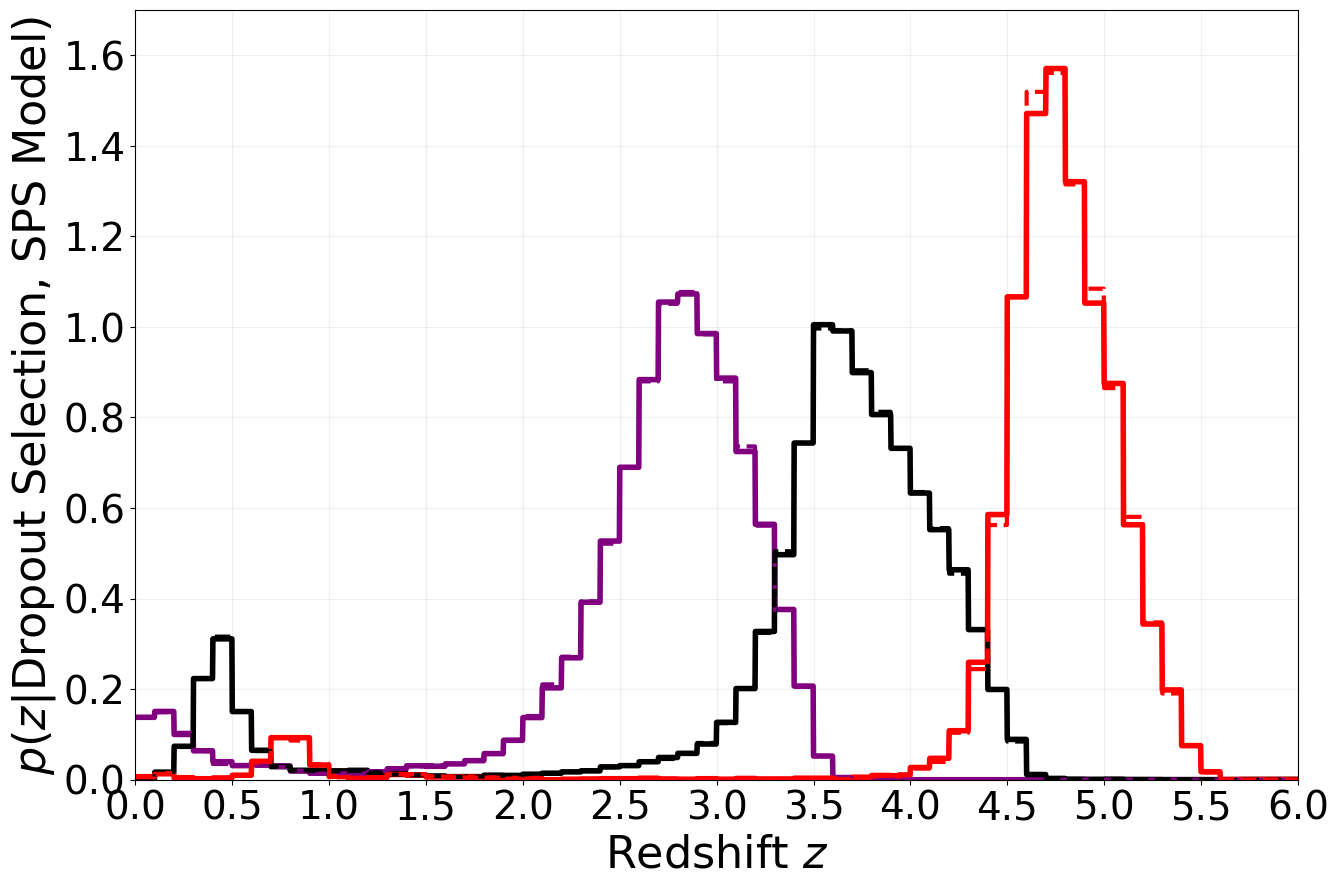

In [4]:
def plot_nzs(axes, nzs, density, a, ls, model, **kwargs):

    ndropouts = 3

    bin_step = 0.1
    bin_start = 0
    bin_end = 7

    bins = np.arange(bin_start, bin_end, bin_step)
    colours = ['purple', 'black', 'red']


    samples=50
    grid = np.arange(bin_start, bin_end-bin_step, bin_step/samples)

    for drop in range(ndropouts):

        values = []
        for ind in range(nzs.shape[0]):
            hist = np.histogram(nzs[ind][drop], density=density, bins=bins)
            oversampled_values = np.repeat(hist[0], samples)
            values.append(oversampled_values)

        values = np.vstack((np.array(values)))
        mean_at_grid_point = np.mean(values, axis=0)
        if(drop == 0):
            axes.plot(grid, mean_at_grid_point, c=colours[drop], **kwargs, label=model, ls=ls, alpha=a)
        else:
            axes.plot(grid, mean_at_grid_point, c=colours[drop], **kwargs, ls=ls, alpha=a)


    #axes.legend(fontsize=18, ncol=3, loc='upper left')
    axes.set_xlabel("Redshift $z$", fontsize=32)
    axes.set_ylabel("$p$($z$|Dropout Selection, SPS Model)", fontsize=32)
    axes.set_xticks(np.arange(0, 7, 0.5))
    axes.tick_params('x', labelsize=28)
    axes.tick_params('y', labelsize=28)
    axes.grid(alpha=0.2)
    axes.set_xlim(0, 6)
    axes.set_ylim(0, 1.7)


density=True
fig1, axes = plt.subplots(1, 1, figsize=(15,10), sharex=False, sharey=False)
plot_nzs(axes, np.array([nzs_1]), density=density, a=1.0, ls='-', model='mean', lw=4)
plot_nzs(axes, np.array([nzs_2]), density=density, a=1.0, ls='--', model='agn', lw=3)